In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_points = 100
center = (3, 3)

# 1. Circle

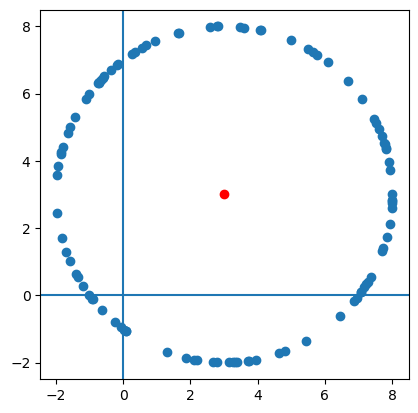

In [3]:
radius = 5

circle = np.zeros((n_points, 2))


for i in range(n_points):

    angle = random.uniform(0, 2*math.pi)

    x = center[0] + radius * math.cos(angle)
    circle[i, 0] = x
    y = center[1] + radius * math.sin(angle)
    circle[i, 1] = y


fig = plt.figure()
ax = fig.add_subplot()

ax.set_axisbelow(True)

ax.axhline(y=0)
ax.axvline(x=0)

plt.scatter(circle[:, 0], circle[:, 1])
plt.scatter(center[0], center[1], color="red")

ax.set_aspect('equal', adjustable='box')


plt.show()

# 2. Square

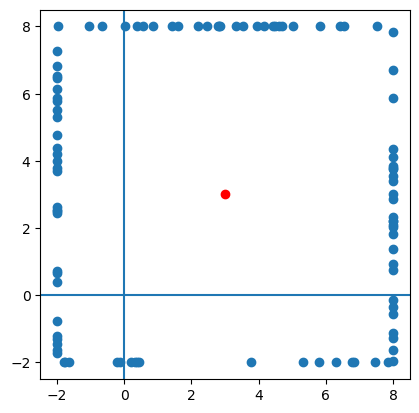

In [4]:
side_length = 10

square = np.zeros((n_points, 2))

half_side = side_length / 2
left = center[0] - half_side
right = center[0] + half_side
bottom = center[1] - half_side
top = center[1] + half_side

for i in range(n_points):
    
    edge = random.choice(['top', 'bottom', 'left', 'right'])
    if edge == 'top':
        x = random.uniform(left, right)
        y = top
    elif edge == 'bottom':
        x = random.uniform(left, right)
        y = bottom
    elif edge == 'left':
        x = left
        y = random.uniform(bottom, top)
    else:
        x = right
        y = random.uniform(bottom, top)
    square[i, 0] = x
    square[i, 1] = y
    
fig = plt.figure()
ax = fig.add_subplot()

ax.set_axisbelow(True)

ax.axhline(y=0)
ax.axvline(x=0)

plt.scatter(square[:, 0], square[:, 1])
plt.scatter(center[0], center[1], color="red")

ax.set_aspect('equal', adjustable='box')


plt.show()

# 3. Elipse

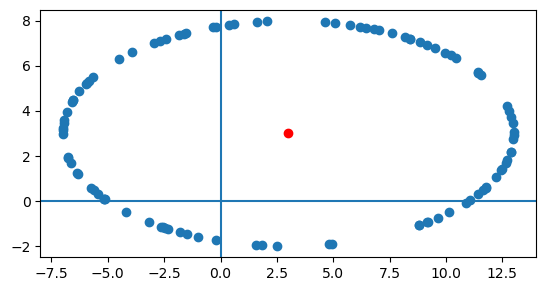

In [5]:
radius_1 = 5
radius_2 = 10

elipse = np.zeros((n_points, 2))


for i in range(n_points):

    angle = random.uniform(0, 2*math.pi)

    x = center[0] + radius_2 * math.cos(angle)
    elipse[i, 0] = x
    y = center[1] + radius_1 * math.sin(angle)
    elipse[i, 1] = y


fig = plt.figure()
ax = fig.add_subplot()

ax.set_axisbelow(True)

ax.axhline(y=0)
ax.axvline(x=0)

plt.scatter(elipse[:, 0], elipse[:, 1])
plt.scatter(center[0], center[1], color="red")

ax.set_aspect('equal', adjustable='box')


plt.show()

In [6]:
from sklearn.decomposition import PCA

In [7]:
circle_pca = PCA(n_components=1, random_state=2023)
square_pca = PCA(n_components=1, random_state=2023)
elipse_pca = PCA(n_components=1, random_state=2023)

circle_pca.fit(circle)
square_pca.fit(square)
elipse_pca.fit(elipse)

PCA(n_components=1, random_state=2023)

In [8]:
circle_pca.explained_variance_

array([13.52442541])

In [9]:
square_pca.explained_variance_

array([18.18050441])

In [10]:
elipse_pca.explained_variance_

array([54.58874923])

# Odpowiedź:  
Analiza głównych składowych (PCA) jest techniką redukcji wymiarowości, która znajduje kierunki, w których dane mają największą wariancję. W przypadku danych 2D, PCA w 1D znajdzie linię, która najlepiej pasuje do danych w sensie minimalizacji odległości między danymi a linią.

Jeśli dane mają kształt __koła__ lub __kwadratu__, to wszystkie kierunki są równie dobre, ponieważ wariancja danych jest taka sama we wszystkich kierunkach. W takim przypadku PCA w 1D nie będzie szczególnie użyteczne, ponieważ żaden kierunek nie będzie lepszy od innych.

Jeśli natomiast dane mają kształt __elipsy__, to PCA w 1D znajdzie linię wzdłuż dłuższej osi elipsy, ponieważ w tym kierunku dane mają największą wariancję. W takim przypadku PCA w 1D może być użyteczne do redukcji wymiarowości danych, ponieważ pozwala na zachowanie jak najwięcej informacji o danych przy jednoczesnym zmniejszeniu ich wymiarowości.